In [1]:
from pynq import pl

import numpy as np
from pynq import allocate
from pynq import Overlay
import matplotlib.pyplot as plt


In [18]:
overlay = Overlay('/home/xilinx/jupyter_notebooks/adc_dma/xadc_dma.bit')

In [19]:
input_buffer = allocate(shape=(200000,), dtype=np.uint16)

In [20]:
dma = overlay.axi_dma


/tmp/ipykernel_848/2949976609.py:6: RuntimeWarning: coroutine '_SDMAChannel.wait_async' was never awaited
  dma.recvchannel.wait_async()


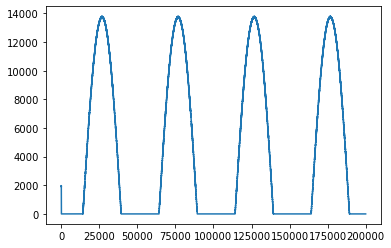

In [21]:
recvstatus = dma.recvchannel.running

dma.buffer_max_size

dma.recvchannel.transfer(input_buffer)
dma.recvchannel.wait_async()
#dma.recvchannel.wait()

plt.plot(input_buffer)